This notebook shows how a machine learning model can be built in python
The steps to accomplish this consist of:
1. Get/choose data! --> (Via Toy datasets or through own personal collection)
2. Load data onto notebook through pandas and import desired regressor models
3. Assign dependent and indenpendent variables from dataset
4. Split the data into a training set and a test set
5. Build the model (linear regression, random forest or something else)
6. Determine the model performance (statistics like MSE and R2)
7. Compare against other regressors?
8. Visualizr results

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load the data
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')

In [3]:
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [4]:
#Assigning the value for x [independent variables]
x = df.drop(['logS'], axis = 1)

In [5]:
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [6]:
#Assigning the value for y [dependent variable]
#y = df.iloc[:,-1]
#y = df.logS
y = df[‘logS’]

In [7]:
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [9]:
#Data splitting for model development
#Define test set as consisting of 20% of the data while 80% of the data goes to the training set
#Training set: subset to train a model
#Test set: subset to test the trained model
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
#Perform linear regression to build the model
lr = LinearRegression() #Initiate linear regression variable
lr.fit(X_train, y_train) #Train the model

y_lr_train_pred = lr.predict(X_train) #Predicted y values using training set
y_lr_test_pred = lr.predict(X_test) #Predicted y values using test set

In [18]:
#Determine performance of linear regression model through mean squared error (MSE) and R2 on training/test sets
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

#Make pandas dataframe that contains results of model training
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

print('The MSE for the training set is:')
print(lr_train_mse)
print('The MSE for the test set is:')
print(lr_test_mse)
lr_results

The MSE for the training set is:
1.0139894491573003
The MSE for the test set is:
0.999084440707531


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.01399,0.769513,0.999084,0.770565


In [22]:
#Perform random forest to build the model
rf = RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(X_train, y_train)

#Predicted values of training and test sets for random forest
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

#Determine performance of random forest
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

#Store results of random forest
rf_results = pd.DataFrame(['Random forest',rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1.05025,0.76127,1.047,0.759562


List of regressors:
    sklearn.linear_model.Ridge
    sklearn.linear_model.SGDRegressor
    sklearn.ensemble.ExtraTreesRegressor
    sklearn.ensemble.GradientBoostingRegressor
    sklearn.neighbors.KNeighborsRegressor
    sklearn.neural_network.MLPRegressor
    sklearn.tree.DecisionTreeRegressor
    sklearn.tree.ExtraTreeRegressor
    sklearn.svm.LinearSVR
    sklearn.svm.SVR

In [23]:
#Combine results from linear regression and random forest into a single dataframe
pd.concat([lr_results, rf_results])

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.01399,0.769513,0.999084,0.770565
0,Random forest,1.05025,0.76127,1.047,0.759562


Text(0.5, 0, 'Experimental LogS')

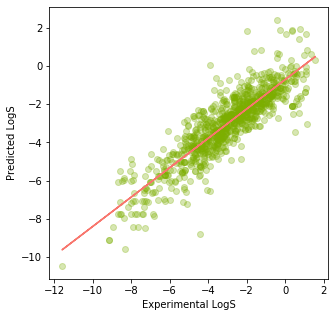

In [26]:
#Visualize results of linear regression
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train),"#F8766D")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')